In [1]:
#read data
# PACKAGE LOADING
import pandas as pd
import os
import numpy as np
import pandas as pd
import collections
import scipy.stats as st
import seaborn as sns
import collections
import matplotlib.pyplot as plt

#DISPLAY ALL THE COLUMNS IN CASE 
pd.set_option('display.max_columns', None)

#SET THE PATH TO LOCAL
os.chdir('/Users/changxuezhi/Desktop/566/')

In [2]:
dia   = pd.read_csv('dia.csv')
wholedf = pd.read_csv('dowjones_ticks.csv')
wholedf.sort_values(['ticker','collection_time'], inplace=True)

In [3]:
after_date = wholedf['collection_time'] >= '2019-10-01'
before_date= wholedf['collection_time'] <= '2019-10-31'
wholedf = wholedf.loc[after_date]
wholedf = wholedf.loc[before_date]

In [4]:
tickerlist=wholedf.ticker.unique()
tickerlist

array(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS',
       'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA',
       'WMT', 'XOM'], dtype=object)

In [62]:
cor=[]
for i in range(len(tickerlist)):#range(len(tickerlist)):
    cr=[]
    for j in range(len(tickerlist)):#range(len(tickerlist)):
        left=wholedf[wholedf['ticker']==tickerlist[i]]
        right=wholedf[wholedf['ticker']==tickerlist[j]]
        result = pd.merge(left, right, on='collection_time', how='outer')
        result = result.sort_values('collection_time')
        result = result.fillna(method = 'pad')
        result =result.fillna(method = 'bfill')
        #df=pd.DataFrame(result[['price_x', 'price_y']])
        #name=[tickerlist[i],tickerlist[j]]
        #df.columns = name
        correlation = result[['price_x', 'price_y']].corr()
        cr.append(correlation.iloc[0,1])
    cor.append(cr)

cor

[[1.0,
  0.7770735099452474,
  -0.7067504081957833,
  0.9299108964607906,
  0.11882499735235094,
  0.8203250644522783,
  0.6008909510711161,
  0.8406718388137002,
  0.9132802929890438,
  0.847166611186713,
  -0.6116877708314025,
  0.8391739499398746,
  -0.30803710796244244,
  0.9238641459355554,
  0.10916373372637304,
  -0.7269978456768237,
  0.8299894026399558,
  0.12949262614538987,
  0.7102537992644895,
  -0.022153596431818343,
  0.8390073158187474,
  0.08908963671634919,
  -0.7341573616966754,
  0.8764296111788317,
  0.9443088962374271,
  0.6341407586361085,
  0.7534939363791576,
  0.7540718572712681,
  0.5317505122371378,
  0.44733151939354837],
 [0.7770735099452474,
  0.9999999979967871,
  -0.562151702906408,
  0.7876850295694918,
  0.4205140813272121,
  0.8430581621373574,
  0.7809072129076604,
  0.6758195260190957,
  0.7907093747205501,
  0.93956696767718,
  -0.526470553471265,
  0.635816091772403,
  -0.09063882943106387,
  0.81337414162484,
  0.26077328964469676,
  -0.39827909

In [77]:
codf=pd.DataFrame(cor)
codf.columns=tickerlist
#codf.index(tickerlist)
codf.index = tickerlist
codf

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
AAPL,1.000000,0.777074,-0.706750,0.929911,0.118825,0.820325,0.600891,0.840672,0.913280,0.847167,-0.611688,0.839174,-0.308037,0.923864,0.109164,-0.726998,0.829989,0.129493,0.710254,-0.022154,0.839007,0.089090,-0.734157,0.876430,0.944309,0.634141,0.753494,0.754072,0.531751,0.447332
AXP,0.777074,1.000000,-0.562152,0.787685,0.420514,0.843058,0.780907,0.675820,0.790709,0.939567,-0.526471,0.635816,-0.090639,0.813374,0.260773,-0.398279,0.827766,0.077308,0.583808,0.352348,0.639129,-0.168396,-0.384379,0.744604,0.780580,0.558964,0.729020,0.874262,0.682782,0.615544
BA,-0.706750,-0.562152,1.000000,-0.699149,-0.252755,-0.580715,-0.466374,-0.602633,-0.721632,-0.599107,0.761047,-0.563603,0.672284,-0.799681,-0.262554,0.616208,-0.724673,0.262397,-0.239057,-0.014182,-0.574515,-0.210206,0.621981,-0.788939,-0.727378,-0.111800,-0.657221,-0.570747,-0.150401,-0.206836
CAT,0.929911,0.787685,-0.699149,1.000000,0.260438,0.855594,0.547635,0.928423,0.965720,0.805021,-0.603229,0.888809,-0.197311,0.950281,0.083991,-0.835788,0.923597,0.056915,0.731035,-0.210873,0.891834,0.160568,-0.778650,0.896575,0.960180,0.555903,0.700460,0.881447,0.305666,0.417020
CSCO,0.118825,0.420514,-0.252755,0.260438,1.000000,0.373800,0.373984,0.270274,0.336854,0.226287,-0.136510,0.238463,-0.109789,0.354694,0.371590,-0.195218,0.420410,-0.016497,0.156332,0.007438,0.234481,0.297764,-0.094303,0.197262,0.258710,0.033678,0.342266,0.434040,-0.046810,0.312923
CVX,0.820325,0.843058,-0.580715,0.855594,0.373800,1.000000,0.605315,0.785515,0.866828,0.820972,-0.387549,0.781637,-0.277941,0.873847,0.163255,-0.664212,0.836968,0.031352,0.631157,-0.027666,0.661528,0.227035,-0.591086,0.720600,0.870132,0.496896,0.638852,0.817869,0.481220,0.758548
DIS,0.600891,0.780907,-0.466374,0.547635,0.373984,0.605315,1.000000,0.395868,0.563587,0.809959,-0.591411,0.325960,-0.034831,0.637374,0.383241,-0.225730,0.656482,-0.146838,0.219619,0.546686,0.344292,-0.154111,-0.350843,0.665778,0.582979,0.353647,0.674017,0.657632,0.737303,0.548316
DOW,0.840672,0.675820,-0.602633,0.928423,0.270275,0.785515,0.395868,1.000000,0.922521,0.712702,-0.499761,0.931319,-0.218776,0.824818,0.023726,-0.813417,0.817246,0.158742,0.822900,-0.359111,0.882486,0.172489,-0.681788,0.739967,0.888194,0.648968,0.577540,0.856054,0.206153,0.325681
GS,0.913280,0.790709,-0.721632,0.965720,0.336854,0.866828,0.563587,0.922520,1.000000,0.778889,-0.555031,0.901687,-0.301412,0.948085,0.097254,-0.849704,0.898634,-0.000465,0.729761,-0.239070,0.863312,0.237741,-0.771174,0.848372,0.949629,0.561891,0.699811,0.871596,0.323284,0.428599
HD,0.847167,0.939567,-0.599107,0.805021,0.226287,0.820972,0.809959,0.712702,0.778889,1.000000,-0.552309,0.603120,-0.121883,0.807249,0.289061,-0.373794,0.802643,0.224159,0.565074,0.383202,0.698524,-0.258929,-0.436069,0.789899,0.797278,0.653948,0.814743,0.848269,0.786377,0.595773


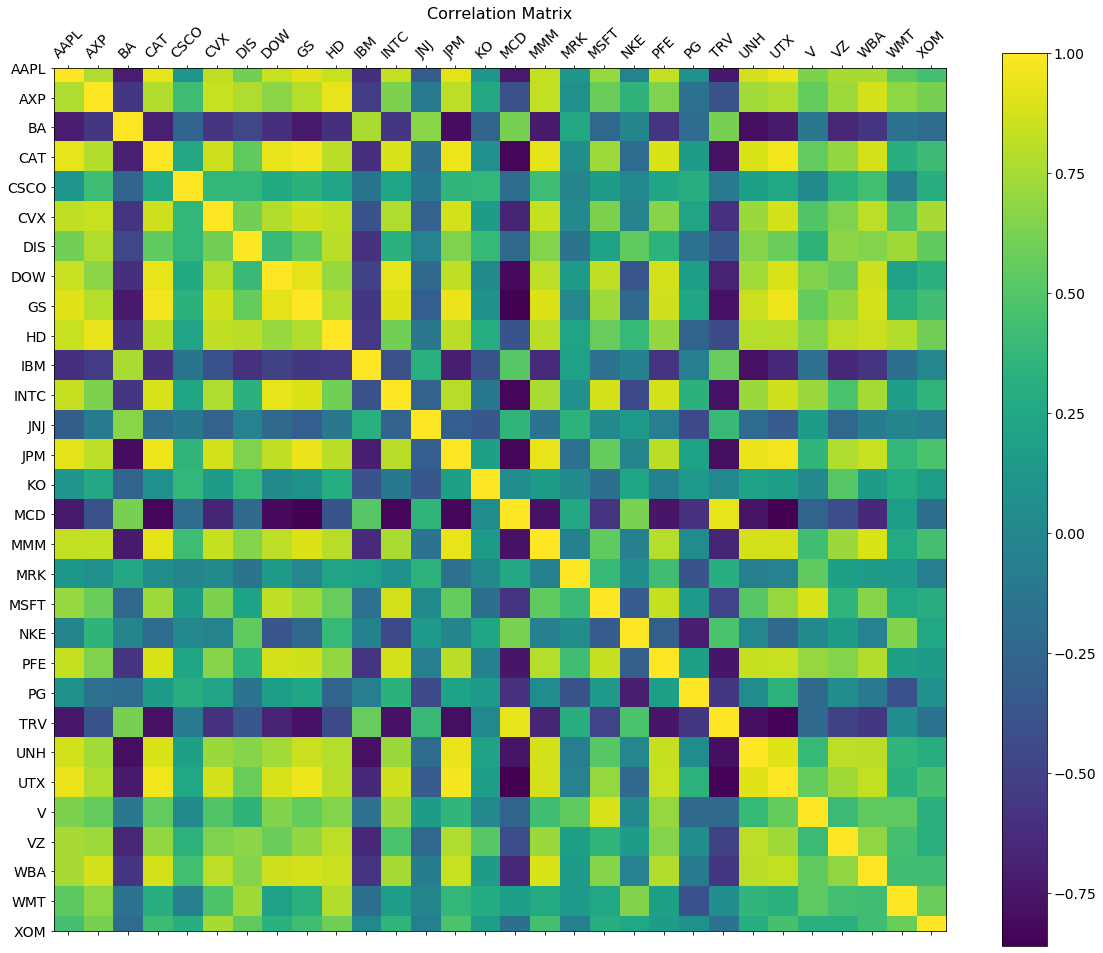

In [79]:
f = plt.figure(figsize=(20, 16))
plt.matshow(codf, fignum=f.number)
plt.xticks(range(codf.shape[1]), codf.columns, fontsize=14, rotation=45)
plt.yticks(range(codf.shape[1]), codf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);